## 네이버 지식IN 을 통한 검색을 워드클라우드

- 물론 네이버 개발자 API를 이용하면 훨씬 빠르게 데이타를 가져올 수 있다

- 간단하게 주소창의 주소로 크롤링한다.

- 크롬 개발자모드에서 검색부분을 가져온다 ( 각 dl 태그 )


In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

%matplotlib inline

# 간단한 한글 폰드 등록
from matplotlib import rc
plt.rcParams['axes.unicode_minus']=False
rc('font', family='Malgun Gothic')


In [6]:
# 주소를 약간 수정함

html = 'https://kin.naver.com/search/list.nhn?query={key_word}&page={num}'
# https://kin.naver.com/search/list.nhn?query=여자친구선물&page=1
response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여자친구 선물')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

In [7]:
# 테스트로 첫번째 페이지의 텍스트만 가져온다
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

['\n\n여자친구 선물 추천\n\n2024.01.07.\n여자친구 선물 해주려고 하는데 최대 12만원 정도면 좋겠고 먹는거나 화장품처럼 없어지는게 아니라 패션템이나 평상시 가지고 다닐 수 있는 물건 이었으면 좋겠어요... \n\n#여자친구\n#여친\n#여자친구선물\n#여친선물\n#여친선물추천\n#선물추천\n\n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 7\n\n',
 '\n\n운동 시작한 여자친구 선물 뭐가 좋을까요?\n\n2024.02.15.\n운동(헬스) 시작한 여자친구 선물 뭐가 좋을까요? 운동 시작한 여자친구 선물 뭐가 좋을까요? 운동(헬스) 시작한 여자친구 선물 뭐가 좋을까요? 질문하셔서 답변드립니다 운동복... \n\n\n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 운동다이어트\n|\n답변수 8\n\n',
 '\n\n30대 여자친구 선물 추천좀요\n\n2024.02.08.\n... 30대 여자친구 선물 추천 받고 싶은데 여자친구가 좀... 30대 여자친구 선물 추천좀요 만난지는 3년 정도 됐고... 30대 여자친구 선물 추천 받고 싶은데 여자친구가 좀 깔끔하고... \n\n\n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 6\n\n',
 '\n\n여자친구 선물 추천 좀 해주세요. 다\n\n2023.07.26.\n여자친구 선물 추천 좀 해주세요. 다음 주가 1주년 기념일인데..... 여자친구 선물로 괜찮은 거 뭐가 있을까요? 여자친구 선물로 배뜨끈 복부온열기 추천 드릴게요. 저도 지난주에... \n\n#여자친구선물추천\n#여자친구선물\n\n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 가족행사, 이벤트\n|\n답변수 19\n\n',
 '\n\n장거리연애 여자친구 선물\n\n2024.01.27.\n장거리연애 여자친구 선물 안녕하세요 장거리연애중인 고1 

In [9]:
#1000 만개 정도의 검색 결과를 읽어온다.
# 첫번째 페이지 start=1, 두번째 페이지인 경우 start=11인거 확인한다.
# 웹 페이지 직접 접근 할 땐느 간단이 time.sleep()으로 요청을 간격적으로 한다.
# 시간이 10분 정도 소요되기에 상태바를 보여준다. ( tqdm.tqdm_notebook 이용)

from urllib.request import urlopen
from tqdm import tqdm_notebook

present_candi_text = []

for n in range(1,50):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자친구 선물')))
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('dl')
    
    for line in tmp:
        present_candi_text.append(line.text)
    time.sleep(0.5)
    
   

In [10]:
len(present_candi_text)

490

In [11]:
present_candi_text[:5]

['\n\n여자친구 선물 추천\n\n2024.01.07.\n여자친구 선물 해주려고 하는데 최대 12만원 정도면 좋겠고 먹는거나 화장품처럼 없어지는게 아니라 패션템이나 평상시 가지고 다닐 수 있는 물건 이었으면 좋겠어요... \n\n#여자친구\n#여친\n#여자친구선물\n#여친선물\n#여친선물추천\n#선물추천\n\n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 7\n\n',
 '\n\n운동 시작한 여자친구 선물 뭐가 좋을까요?\n\n2024.02.15.\n운동(헬스) 시작한 여자친구 선물 뭐가 좋을까요? 운동 시작한 여자친구 선물 뭐가 좋을까요? 운동(헬스) 시작한 여자친구 선물 뭐가 좋을까요? 질문하셔서 답변드립니다 운동복... \n\n\n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 운동다이어트\n|\n답변수 8\n\n',
 '\n\n30대 여자친구 선물 추천좀요\n\n2024.02.08.\n... 30대 여자친구 선물 추천 받고 싶은데 여자친구가 좀... 30대 여자친구 선물 추천좀요 만난지는 3년 정도 됐고... 30대 여자친구 선물 추천 받고 싶은데 여자친구가 좀 깔끔하고... \n\n\n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 6\n\n',
 '\n\n여자친구 선물 추천 좀 해주세요. 다\n\n2023.07.26.\n여자친구 선물 추천 좀 해주세요. 다음 주가 1주년 기념일인데..... 여자친구 선물로 괜찮은 거 뭐가 있을까요? 여자친구 선물로 배뜨끈 복부온열기 추천 드릴게요. 저도 지난주에... \n\n#여자친구선물추천\n#여자친구선물\n\n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 가족행사, 이벤트\n|\n답변수 19\n\n',
 '\n\n장거리연애 여자친구 선물\n\n2024.01.27.\n장거리연애 여자친구 선물 안녕하세요 장거리연애중인 고1 

In [13]:
#위의 리스트를 하나의 변수에 저장하기

present_text = ""
for each_line in present_candi_text:
    present_text = present_text + each_line+ "\n"

In [15]:
#형태소 분석
import nltk
from konlpy.tag import Okt

okt = Okt()

tokens_ok=okt.morphs(present_text)
print(tokens_ok)

['\n\n', '여자친구', '선물', '추천', '\n\n', '2024.01', '.', '07', '.', '\n', '여자친구', '선물', '해주려고', '하는데', '최대', '12만원', '정도', '면', '좋겠고', '먹는거나', '화장품', '처럼', '없어지는게', '아니라', '패션', '템', '이나', '평상시', '가지', '고', '다닐', '수', '있는', '물건', '이었으면', '좋겠어요', '...', '#여자친구', '\n', '#여친', '\n', '#여자친구선물', '\n', '#여친선물', '\n', '#여친선물추천', '\n', '#선물추천', '\n\n\n', 'Q', '&', 'A', '\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t ', '>', '연애', ',', '결혼', '\n', '|', '\n', '답변', '수', '7', '\n\n\n\n\n', '운동', '시작', '한', '여자친구', '선물', '뭐', '가', '좋을까요', '?', '\n\n', '2024.02', '.', '15', '.', '\n', '운동', '(', '헬스', ')', '시작', '한', '여자친구', '선물', '뭐', '가', '좋을까요', '?', '운동', '시작', '한', '여자친구', '선물', '뭐', '가', '좋을까요', '?', '운동', '(', '헬스', ')', '시작', '한', '여자친구', '선물', '뭐', '가', '좋을까요', '?', '질문', '하셔서', '답변', '드립니다', '운동복', '...', 'Q', '&', 'A', '\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t ', '>', '운동', '다이어트', '\n', '|', '\n', '답변', '수', '8', '\n\n\n\n\n', '30', '대', '여자친구', '선물', '추천', '좀', '요', '\n\n', '2024.02', '.', '08', '.'

In [30]:
ko=nltk.Text(tokens_ok)
#print(len(ko.tokens))
#print(len(set(ko.tokens)))
#print(set(ko.tokens))
ko.vocab().most_common(100)

[('선물', 1553),
 ('여자친구', 1410),
 ('\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t ', 490),
 ('\n\n\n\n\n', 306),
 ('\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t', 184),
 ('연애', 147),
 ('결혼', 131),
 ('목걸이', 101),
 ('****)', 94),
 ('\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\n\n\n',
  94),
 ('****', 90),
 ('\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\n\n\n', 89),
 ('하는데', 87),
 ('화장품', 87),
 ('이벤트', 83),
 ('해주세요', 80),
 ('고민', 80),
 ('좋을까요', 77),
 ('안녕하세요', 75),
 ('#여자친구선물', 71),
 ('입니다', 71),
 ('가족', 70),
 ('행사', 68),
 ('향수', 63),
 ('30', 58),
 ('좋은', 57),
 ('하고', 54),
 ('여자', 53),
 ('합니다', 53),
 ('저', 52),
 ('인', 50),
 ('지갑', 47),
 ('생일', 47),
 ('뭘', 45),
 ('15', 43),
 ('이나', 41),
 ('걸', 41),
 ('생각', 41),
 ('12', 40),
 ('정도', 37),
 ('가방', 37),
 ('#여자친구', 36),
 ('감동', 36),
 ('100일', 36),
 ('괜찮은', 35),
 ('이번', 35),
 ('친구', 34),
 ('#선물', 34),
 ('너무', 34),
 ('드려요', 33),
 ('안', 33),
 ('이라', 33),
 ('제품', 33),
 ('적', 32),
 ('부탁드립니다', 32),
 ('팔찌', 32),


In [29]:
# 의미없는 단어들을 수동으로 제거해준다.
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지','\n','ㅠㅠ','??'
             ,'\n\n','\n\n\n',"\n\n\n\n",
             'Q','A','1','2','3','4','5','!','<','>','|','&','추천','(',')']

tokens_ok = [each_word for each_word in tokens_ok
                          if each_word not in stop_words]




In [ ]:
#!pip install wordcloud

In [37]:
""" 워드 크라우드 그리기 """

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

data=ko.vocab().most_common(100)
#print(data)
#튜플 형식으로 잡히는데 첫번째는 단어 2번째는그 단어나 나온 갯수이다.
data_list=[]

for txt,cnt in data:
    data_list.append(txt)
#print(data_list)

data_str=' '.join(data_list)
#print(data_str)

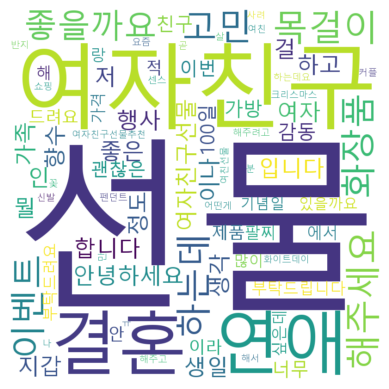

In [42]:
wordcloud = WordCloud(font_path="malgun",background_color="white",width=400,height=400,scale=2.0,max_font_size=200)
wordcloud.generate(data_str)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
""" 이미지로 마스킹하여 워드 크라우드 그리기 """


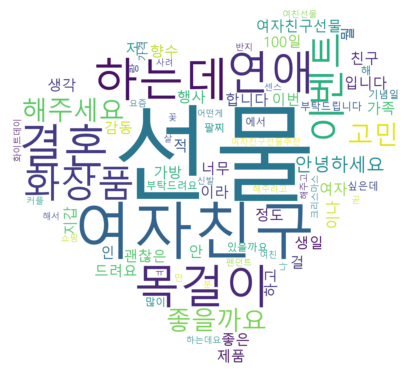

In [43]:
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('./img/heart_image.jpg'))

wordcloud = WordCloud(font_path="malgun"
                      ,background_color="white"
                      ,width=400,height=400
                      ,scale=2.0
                      ,max_font_size=200
                     , mask=mask)
wordcloud.generate(data_str)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

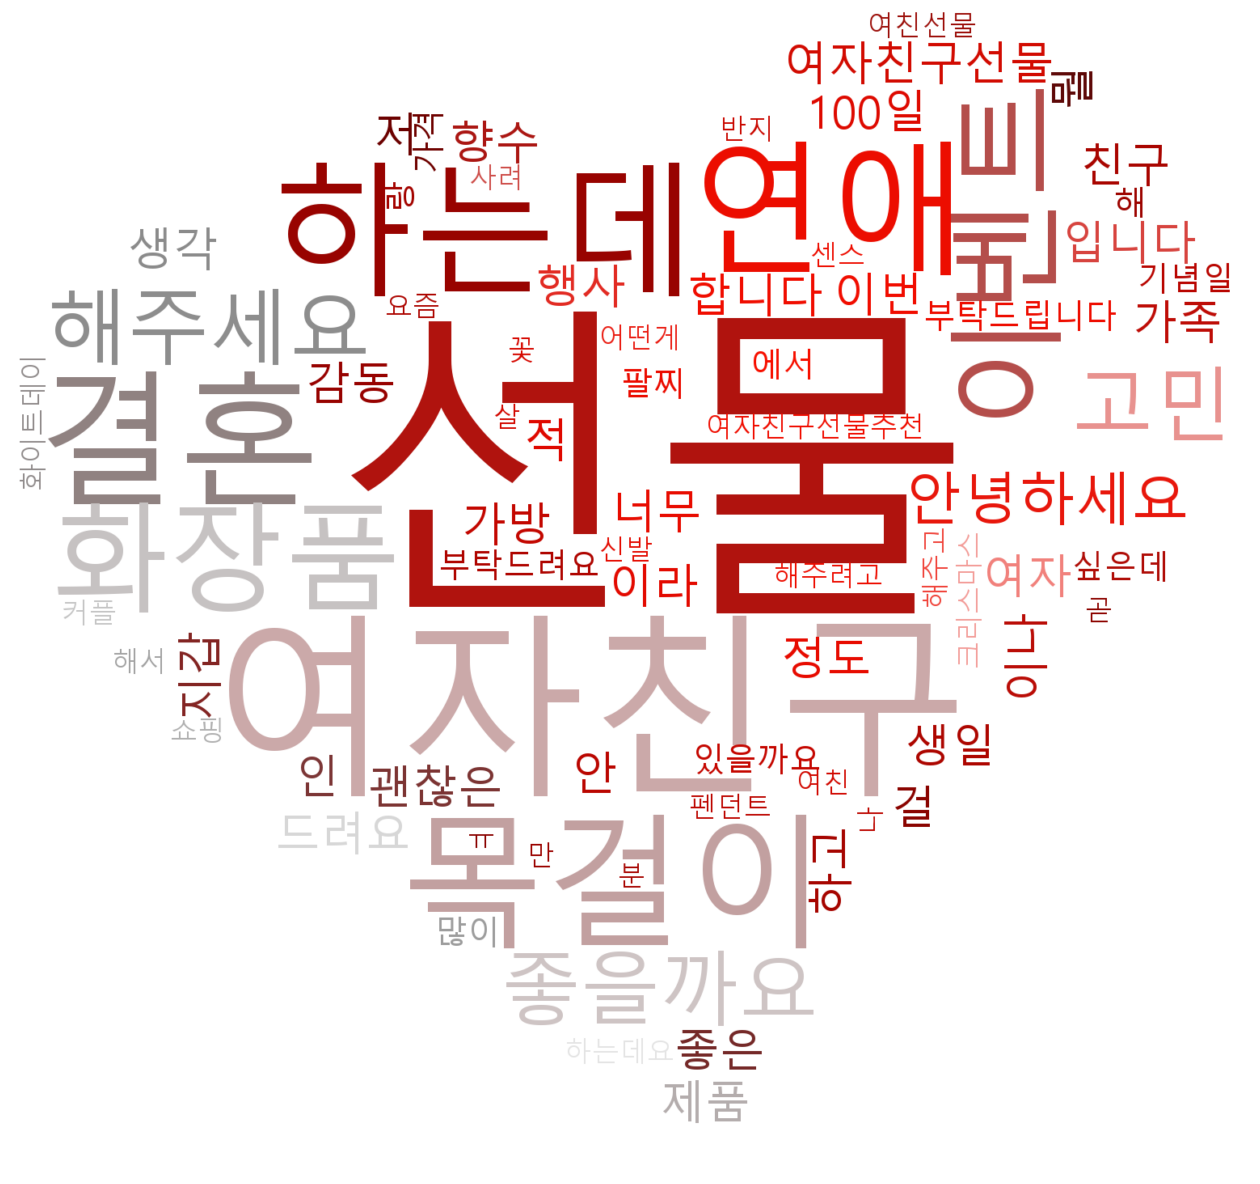

In [44]:
plt.figure(figsize=(16,16))
plt.imshow(wordcloud.recolor(color_func=ImageColorGenerator(mask))
           ,interpolation="bilinear")
plt.axis("off")
plt.show()